In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

In [20]:
iris = load_iris()
X = iris.data
y = iris.target

In [21]:
mask = (y==0) | (y==1)
X = X[mask]
y = y[mask]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50, learning_rate = 0.2)

In [24]:
abc.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2)

In [25]:
y_pred = abc.predict(X_test)

In [26]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average = 'weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



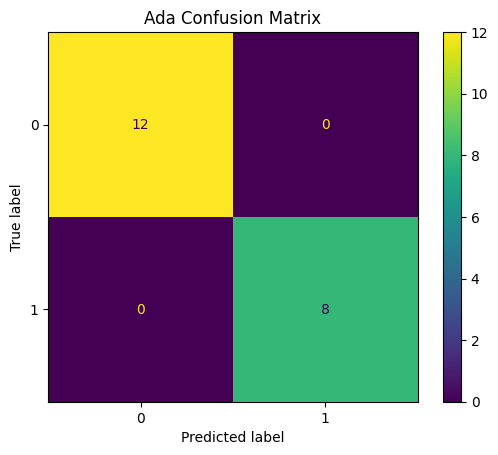

In [27]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Ada Confusion Matrix')
plt.show()

In [28]:
y_probs = abc.predict_proba(X_test)[:,1]

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [30]:
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc}")

AUC: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


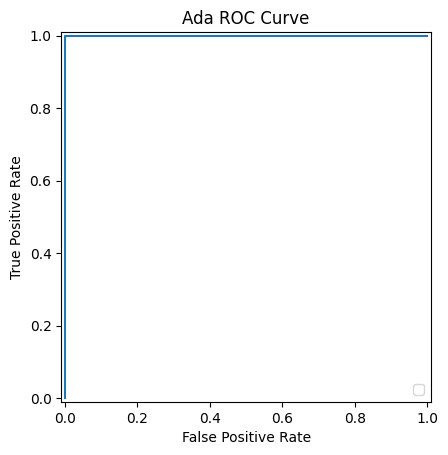

In [31]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('Ada ROC Curve')
plt.show()